Работа с NumPy

In [1]:

import numpy as np


matrix = np.array([[4, 5, 0], [9, 9, 9]])
print("matrix = \n", matrix, "\n")


tmatrix = matrix.T
print("tmatrix = \n", tmatrix, "\n")


vector = np.ravel(matrix)
print("vector = \n", vector, "\n")


tvector = np.reshape(vector, (6, 1))
print("tvector = \n", tvector, "\n")

list_matrix = list(matrix)
print("list_matrix = \n", list_matrix, "\n")

str_matrix = str(matrix)
print("matrix as str = \n", str_matrix, "\n")

print("matrix type is", type(matrix), "\n")

print("vector type is", type(vector), "\n")

print("list_matrix type is", type(list_matrix), "\n")

print("str_matrix type is", type(str_matrix), "\n")


formatted_vector = "; ".join(map(str, vector))

print("formatted_vector = \n", formatted_vector, "\n")

matrix = 
 [[4 5 0]
 [9 9 9]] 

tmatrix = 
 [[4 9]
 [5 9]
 [0 9]] 

vector = 
 [4 5 0 9 9 9] 

tvector = 
 [[4]
 [5]
 [0]
 [9]
 [9]
 [9]] 

list_matrix = 
 [array([4, 5, 0]), array([9, 9, 9])] 

matrix as str = 
 [[4 5 0]
 [9 9 9]] 

matrix type is <class 'numpy.ndarray'> 

vector type is <class 'numpy.ndarray'> 

list_matrix type is <class 'list'> 

str_matrix type is <class 'str'> 

formatted_vector = 
 4; 5; 0; 9; 9; 9 



Работа с Pandas DataFrame

https://pandas.pydata.org/docs/user_guide/10min.html

Работа с данными - чтение и запись CSV

In [3]:
import pandas as pd

df = pd.read_csv("data/healthcare-dataset-stroke-data.csv", index_col="id")

df.to_csv("test.csv")

Работа с данными - основные команды

In [20]:
df.info()

print(df.describe().transpose())

clear_df = df.drop(["heart_disease", "ever_married", "Residence_type"], axis=1)
print(clear_df.head())
print(clear_df.tail())

sorted_df = clear_df.sort_values(by="age")
print(sorted_df.head())
print(sorted_df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.1+ KB
                    count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00 

Работа с данными - работа с элементами

In [19]:
print(df["bmi"])

print(df.loc[9046])

print(df.loc[9046, "gender"])

print(df.loc[9046:53882, ["gender", "bmi"]])

print(df[0:3])

print(df.iloc[0])

print(df.iloc[3:5, 0:2])

print(df.iloc[[3, 4], [0, 1]])

id
9046     36.6
51676     NaN
31112    32.5
60182    34.4
1665     24.0
         ... 
18234     NaN
44873    40.0
19723    30.6
37544    25.6
44679    26.2
Name: bmi, Length: 5110, dtype: float64
gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 9046, dtype: object
Male
       gender   bmi
id                 
9046     Male  36.6
51676  Female   NaN
31112    Male  32.5
60182  Female  34.4
1665   Female  24.0
56669    Male  29.0
53882    Male  27.4
       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0      

Работа с данными - отбор и группировка

In [26]:
s_values = df["gender"].unique()
print(s_values)

s_total = 0
for s_value in s_values:
    count = df[df["gender"] == s_value].shape[0]
    s_total += count
    print(s_value, "count =", count)
print("Total count = ", s_total)

print(df.groupby(["ever_married", "avg_glucose_level"]).size().reset_index(name="Count"))  # type: ignore

['Male' 'Female' 'Other']
Male count = 2115
Female count = 2994
Other count = 1
Total count =  5110
     ever_married  avg_glucose_level  Count
0              No              55.12      1
1              No              55.25      1
2              No              55.34      1
3              No              55.35      1
4              No              55.39      1
...           ...                ...    ...
4445          Yes             263.56      1
4446          Yes             267.60      1
4447          Yes             267.61      1
4448          Yes             267.76      1
4449          Yes             271.74      1

[4450 rows x 3 columns]


Визуализация - Исходные данные

In [27]:
data = df[["gender", "age", "bmi"]].copy()
data.dropna(subset=["bmi"], inplace=True)
print(data)

       gender   age   bmi
id                       
9046     Male  67.0  36.6
31112    Male  80.0  32.5
60182  Female  49.0  34.4
1665   Female  79.0  24.0
56669    Male  81.0  29.0
...       ...   ...   ...
14180  Female  13.0  18.6
44873  Female  81.0  40.0
19723  Female  35.0  30.6
37544    Male  51.0  25.6
44679  Female  44.0  26.2

[4909 rows x 3 columns]


Визуализация - Сводка пяти чисел

<img src="assets/quantile.png" width="400" style="background-color: white">

          age                               
          min    q1    q2 median    q3   max
gender                                      
Female   0.08  26.0  44.0   44.0  60.0  82.0
Male     0.08  21.0  45.0   45.0  60.5  82.0
Other   26.00  26.0  26.0   26.0  26.0  26.0
           age               
       low_iqr   iqr high_iqr
gender                       
Female     0.0  34.0   111.00
Male       0.0  39.5   119.75
Other     26.0   0.0    26.00


<Axes: title={'center': 'age'}, xlabel='gender'>

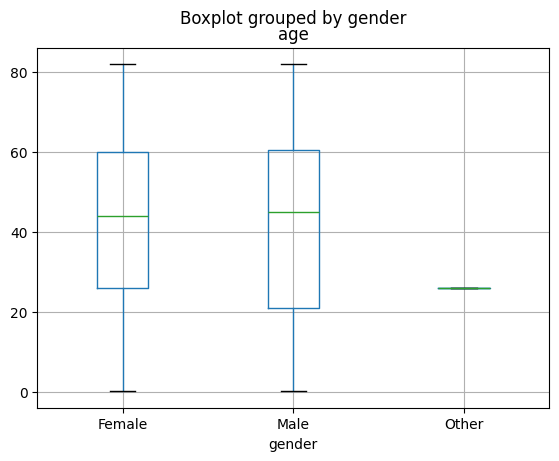

In [28]:
def q1(x):
    return x.quantile(0.25)


# median = quantile(0.5)
def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)


def iqr(x):
    return q3(x) - q1(x)


def low_iqr(x):
    return max(0, q1(x) - 1.5 * iqr(x))


def high_iqr(x):
    return q3(x) + 1.5 * iqr(x)


quantiles = data[["gender", "age"]].groupby(["gender"]).aggregate(["min", q1, q2, "median", q3, "max"])
print(quantiles)

iqrs = data[["gender", "age"]].groupby(["gender"]).aggregate([low_iqr, iqr, high_iqr])
print(iqrs)

data.boxplot(column="age", by="gender")

Визуализация - Гистограмма

<Axes: ylabel='Frequency'>

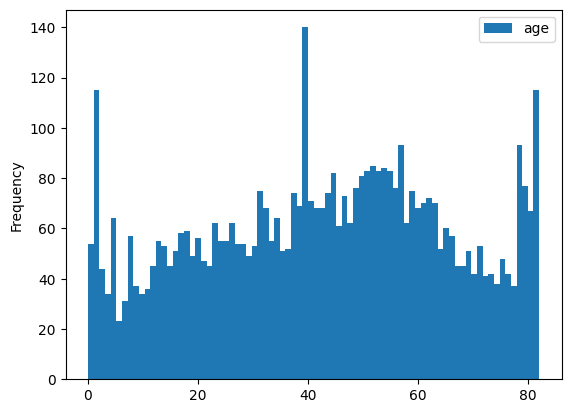

In [29]:
data.plot.hist(column=["age"], bins=80)

Визуализация - Точечная диаграмма

<Axes: xlabel='smoking_status', ylabel='age'>

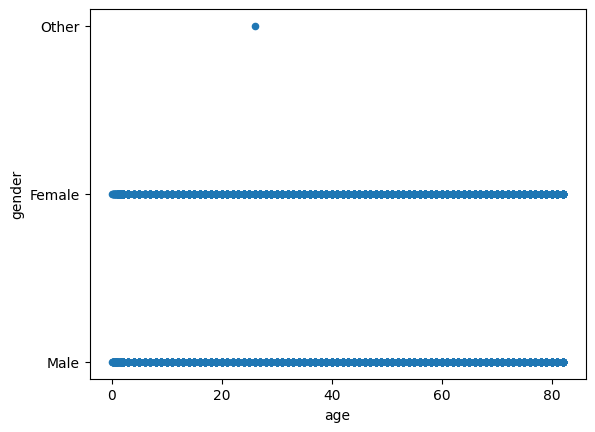

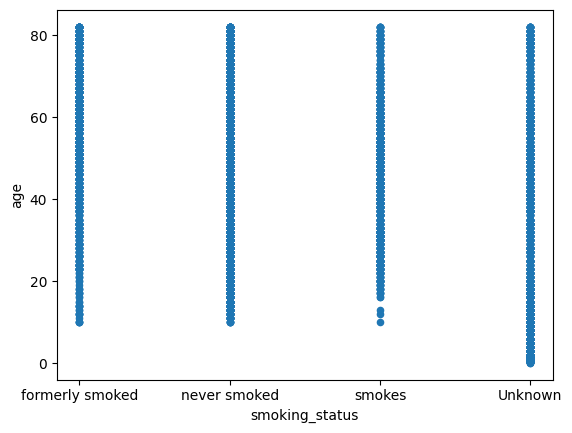

In [41]:
df.plot.scatter(x="age", y="gender")

df.plot.scatter(x="smoking_status", y="age")

Визуализация - Столбчатая диаграмма

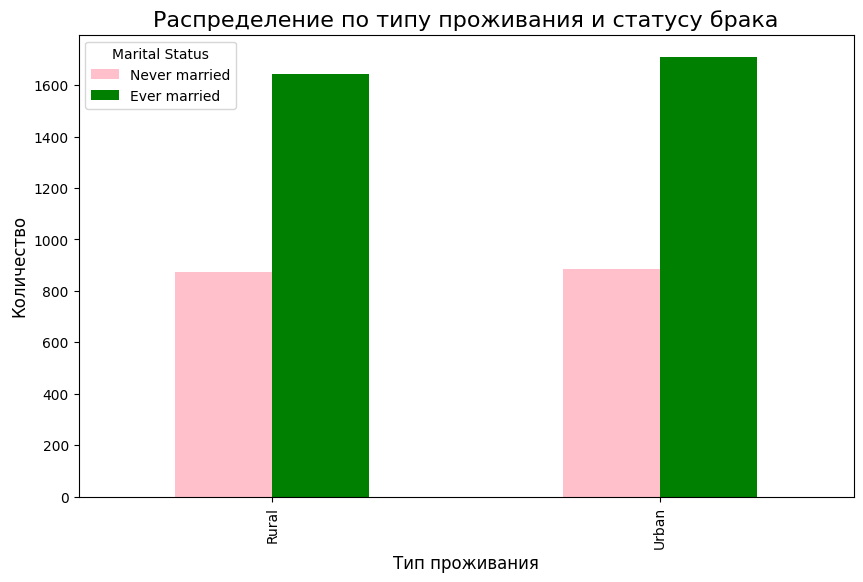

In [34]:
import matplotlib.pyplot as plt

plot = (
    df.groupby(
        ["Residence_type", "ever_married"]
    )  
    .size()
    .unstack()  # Преобразование таблицы для корректной визуализации
    .plot.bar(
        color=["pink", "green"], figsize=(10, 6)
    )
)


plot.legend(["Never married", "Ever married"], title="Marital Status")
plot.set_title("Распределение по типу проживания и статусу брака", fontsize=16)
plot.set_xlabel("Тип проживания", fontsize=12)
plot.set_ylabel("Количество", fontsize=12)

# Показать диаграмму
plt.show()

Визуализация - Временные ряды

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   my_date      243 non-null    object        
 1   my_value     243 non-null    float64       
 2   bullet       2 non-null      object        
 3   bulletClass  2 non-null      object        
 4   label        2 non-null      object        
 5   date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.5+ KB
        my_date  my_value bullet bulletClass label       date
0    28.03.2023   76.5662    NaN         NaN   NaN 2023-03-28
1    31.03.2023   77.0863    NaN         NaN   NaN 2023-03-31
2    01.04.2023   77.3233    NaN         NaN   NaN 2023-04-01
3    04.04.2023   77.9510    NaN         NaN   NaN 2023-04-04
4    05.04.2023   79.3563    NaN         NaN   NaN 2023-04-05
..          ...       ...    ...         ...   ...        ..

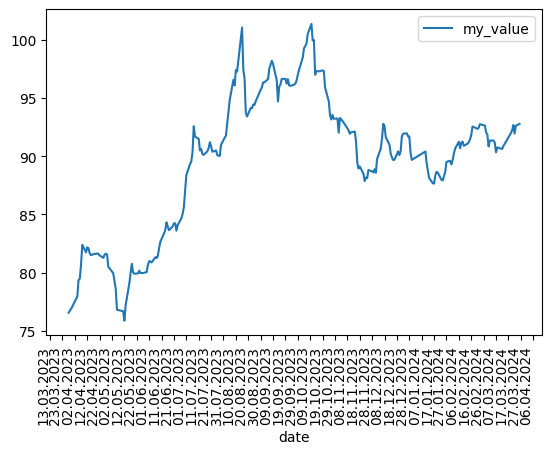

In [36]:
from datetime import datetime
import matplotlib.dates as md

ts = pd.read_csv("data/dollar.csv")
ts["date"] = ts.apply(lambda row: datetime.strptime(row["my_date"], "%d.%m.%Y"), axis=1)
ts.info()

print(ts)

plot = ts.plot.line(x="date", y="my_value")
plot.xaxis.set_major_locator(md.DayLocator(interval=10))
plot.xaxis.set_major_formatter(md.DateFormatter("%d.%m.%Y"))
plot.tick_params(axis="x", labelrotation=90)